In [1]:
import numpy as np
import math
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import os
%matplotlib inline
sns.set_style("whitegrid")

# Plotting the squared distance to true mean with 100 datasets

200


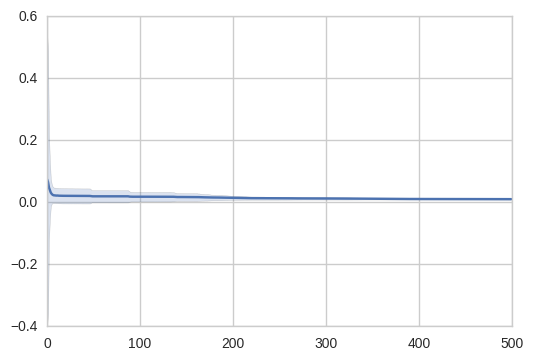

In [147]:
M = np.matrix([[0.95, 0.05],[0.05, 0.95]])
cpd = AndreasBayesFilterSOFT(2,M)
me, varme= computeMeanError(cpd)
plt.plot(range(len(me)), me)
plt.fill_between(range(len(me)), me-varme, me+varme, alpha=0.2)
plt.show()

200
200


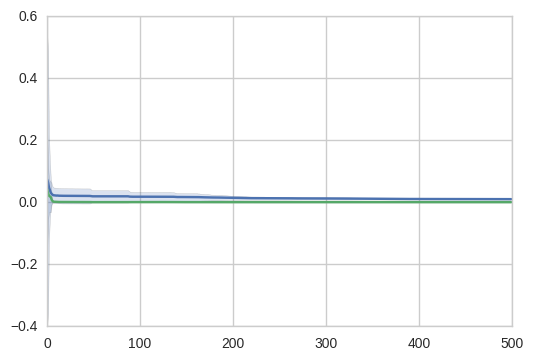

In [149]:
M = np.matrix([[0.95, 0.05],[0.05, 0.95]])
cpd1 = AndreasBayesFilterSOFT(2,M)
me1, varme1= computeMeanError(cpd1)
plt.plot(range(len(me1)), me1)
plt.fill_between(range(len(me1)), me1-varme1, me1+varme1, alpha=0.2)
cpd2 = AndreasBayesFilterMAP(2,M)
me2, varme2= computeMeanError(cpd2)
plt.plot(range(len(me2)), me2)
plt.fill_between(range(len(me2)), me2-varme2, me2+varme2, alpha=0.2)
plt.show()

200


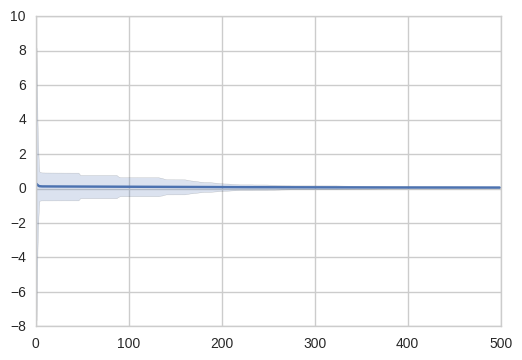

In [145]:
M = np.matrix([[0.95, 0.05],[0.05, 0.95]])
cpd = AndreasBayesFilterSOFT(2,M)
me, varme= computeMeanError(cpd)
plt.plot(range(len(me)), me)
plt.fill_between(range(len(me)), me-varme, me+varme, alpha=0.2)
plt.show()

In [142]:
def computeMeanError(cpd):
    meanOfMeans = []
    varOfMeans = []
    approxMeans = []
    for filename in os.listdir(os.getcwd()+'/dataset/datamodel-data/')[:]:
        if filename[-1] == 't':
            m0 = int(filename[0])
            m1 = -1 * int(filename[2])
            with open('dataset/datamodel-data/{0}'.format(filename), 'rb') as f:
                #print 'f1-dist-data/data/dist-{0}-{1}.txt'.format(md,i)
                d = pickle.load(f)
            z,m,v,cp = cpd.run(d)
            #plotMultiStateParticleAna(d, z, m, v, cp)
            #compute squared mean error
            truemeans = [m0,m1]

            for tm in truemeans:
                minState = -1
                minDist = 1000
                minMeans = []
                for s in range(len(m[0])):
                    a = [x[minState] for x in m]
                    #plt.plot(range(len(a)), a)
                    dist = (m[-1][s] - tm)**2
                    if dist < minDist:
                        minState = s
                        minDist = dist
                means = [x[minState] for x in m]
                means = np.array(means)
                means -= int(tm)
                means = means**2
                approxMeans.append(means)
                #plt.plot(range(len(means)), means)
                
            #plt.scatter(range(len(d)),d)    
            #plt.show()

    #print approxMeans
    for i in range(len(approxMeans[0])):
        xi = [x[i] for x in approxMeans]
        meanOfMeans.append(np.mean(xi))
        varOfMeans.append(np.var(xi))
    print len(approxMeans)    
    return np.array(meanOfMeans),np.array(varOfMeans)



    

In [61]:
a = [1,2,3,4]
a = np.array(a)
a -= 1
print a

[0 1 2 3]


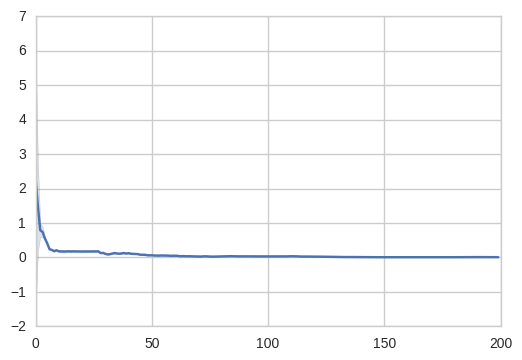

In [67]:
#eval mean convergance
truemeans =[2,-3]
approxMeans = []
for tm in truemeans:
    minState = -1
    minDist = 1000
    minMeans = []
    for s in range(len(m[0])):
        means = [x[s] for x in m]
        means = np.array(means)
        means -= tm
        means = means**2
        #plt.plot(range(len(means)),means)
        if means[-1] < minDist:
            minState = s
            minDist = means[-1]
            minMeans = means
    approxMeans.append(minMeans)
meanOfMeans = []
varOfMeans = []
for i in range(len(approxMeans[0])):
    xi = [x[i] for x in approxMeans]
    
    meanOfMeans.append(np.mean(xi))
    varOfMeans.append(np.var(xi))
meanOfMeans = np.array(meanOfMeans)
varOfMeans = np.array(varOfMeans)
plt.plot(range(len(meanOfMeans)), meanOfMeans)

plt.fill_between(range(len(meanOfMeans)), meanOfMeans-varOfMeans, meanOfMeans+varOfMeans, alpha=0.2)
plt.show()

## F1-score over distance of means

In [3]:
import pickle

In [107]:
#create data and save it
meanDist = np.arange(0.5,8,0.5)
for md in meanDist:
    for i in range(20):
        d = TestData(mean=[0,md], var=[1,1], n=10, skips=8)
        with open('f1-dist-data/dist-{0}-{1}.txt'.format(md,i), 'a') as f:
            pickle.dump(d, f)

In [123]:
with open('f1-dist-data/anderasMAP/dist-test.txt'.format(md,i), 'a') as f:
            pickle.dump([34,'a'], f)

In [120]:
meanDist = np.arange(0.5,8,0.5)
for md in meanDist:
    f1Scores = []
    for i in range(20):
        with open('f1-dist-data/data/dist-{0}-{1}.txt'.format(md,i), 'rb') as f:
            #print 'f1-dist-data/data/dist-{0}-{1}.txt'.format(md,i)
            d = pickle.load(f)
        cpd = MultiStateChangePointDetection(BootstrapFilter)
        z,m,v, cp = cpd.run(d[0])
        f1Scores.append(evaluate(d[1], cp, None, m))
    with open('f1-dist-data/particleFilter/f1-{0}.txt'.format(md), 'a') as f:
            pickle.dump(f1Scores, f)

f1-dist-data/dist-0.5-0.txt
F1: 0.185185185185
f1-dist-data/dist-0.5-1.txt
F1: 0.133333333333
f1-dist-data/dist-0.5-2.txt
F1: 0.181818181818
f1-dist-data/dist-0.5-3.txt
F1: 0.16
f1-dist-data/dist-0.5-4.txt
F1: 0.210526315789
f1-dist-data/dist-0.5-5.txt
F1: 0.24
f1-dist-data/dist-0.5-6.txt
F1: 0.235294117647
f1-dist-data/dist-0.5-7.txt
F1: 0.2
f1-dist-data/dist-0.5-8.txt
F1: 0.2
f1-dist-data/dist-0.5-9.txt
F1: 0.181818181818
f1-dist-data/dist-0.5-10.txt
F1: 0.166666666667
f1-dist-data/dist-0.5-11.txt
F1: 0.260869565217
f1-dist-data/dist-0.5-12.txt
F1: 0.137931034483
f1-dist-data/dist-0.5-13.txt
F1: 0.19512195122
f1-dist-data/dist-0.5-14.txt
F1: 0.133333333333
f1-dist-data/dist-0.5-15.txt
F1: 0.0952380952381
f1-dist-data/dist-0.5-16.txt
F1: 0.25
f1-dist-data/dist-0.5-17.txt
F1: 0.2
f1-dist-data/dist-0.5-18.txt
F1: 0.206896551724
f1-dist-data/dist-0.5-19.txt
F1: 0.181818181818
f1-dist-data/dist-1.0-0.txt
F1: 0.25
f1-dist-data/dist-1.0-1.txt
F1: 0.0909090909091
f1-dist-data/dist-1.0-2.txt


In [14]:
M = np.matrix([[0.9, 0.1],[0.1, 0.9]])
meanDist = np.arange(0.5,8,0.5)
for md in meanDist:
    f1Scores = []
    for i in range(20):
        with open('f1-dist-data/data/dist-{0}-{1}.txt'.format(md,i), 'rb') as f:
            #print 'f1-dist-data/data/dist-{0}-{1}.txt'.format(md,i)
            d = pickle.load(f)
        cpd = AndreasBayesFilterSOFT(2,M)
        z,m,v, cp = cpd.run(d[0])
        f1Scores.append(evaluate(d[1], cp, None, m))
    with open('f1-dist-data/andreasSOFT/f1-{0}.txt'.format(md), 'a') as f:
            pickle.dump(f1Scores, f)

F1: 0.2
F1: 0.235294117647
F1: 0.181818181818
F1: 0.08
F1: 0.2
F1: 0.30303030303
F1: 0.117647058824
F1: 0.0625
F1: 0.363636363636
F1: 0.0909090909091
F1: 0.315789473684
F1: 0.193548387097
F1: 0.285714285714
F1: 0.153846153846
F1: 0.105263157895
F1: 0.111111111111
F1: 0.25
F1: 0.125
F1: 0.24
F1: 0.222222222222
F1: 0.148148148148
F1: 0.0909090909091
F1: 0.148148148148
F1: 0.222222222222
F1: 0.260869565217
F1: 0.111111111111
F1: 0.111111111111
F1: 0.24
F1: 0.222222222222
F1: 0.235294117647
F1: 0.25
F1: 0.357142857143
F1: 0.111111111111
F1: 0.117647058824
F1: 0.0909090909091
F1: 0.307692307692
F1: 0.24
F1: 0.142857142857
F1: 0.105263157895
F1: 0.363636363636
F1: 0.222222222222
F1: 0.166666666667
F1: 0.2
F1: 0.357142857143
F1: 0.181818181818
F1: 0.266666666667
F1: 0.266666666667
F1: 0.2
F1: 0.153846153846
F1: 0.222222222222
F1: 0.142857142857
F1: 0.230769230769
F1: 0.272727272727
F1: 0.166666666667
F1: 0.333333333333
F1: 0.24
F1: 0.2
F1: 0.142857142857
F1: 0.125
F1: 0.375
F1: 0.384615384615

In [5]:
def TestData(mean=[5,0,-5], var=[1,1,1], n=5, skips=10):
    cp = [1]
    data = np.random.normal(mean[1],var[1],n)
    for i in range(skips):
        cp.append((i+1)*n+1)
        data = np.append(data, np.random.normal(mean[i%len(mean)],var[i%len(var)],n))
    return data, cp

F1: 0.4


0.4

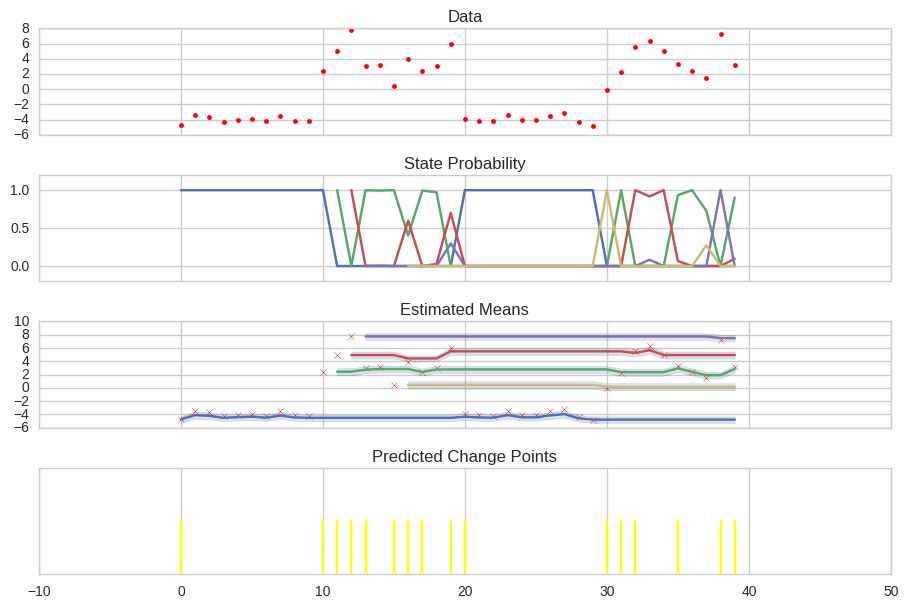

In [18]:
trueMean = [4,-4]
trueVar = [2,0.5]
d, trueCP = TestData(mean=trueMean, var=trueVar, n=10, skips=3)
cpd = MultiStateChangePointDetection(BootstrapFilter)
z,m,v, cp = cpd.run(d)
plotMultiStateParticleSub(d, z, m, v, cp, trueCP)
evaluate(trueCP, cp, trueMean, m)

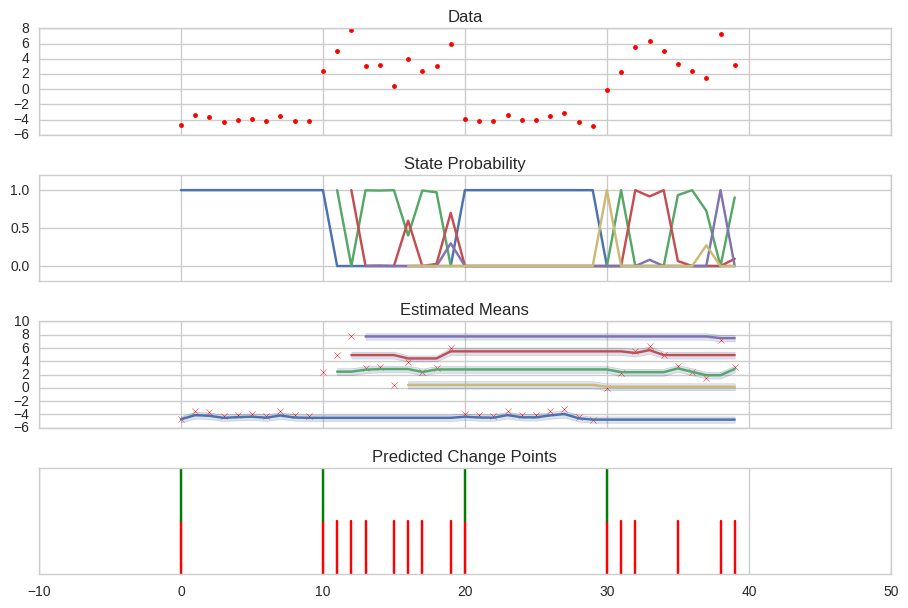

In [22]:
plotMultiStateParticleSub(d, z, m, v, cp, trueCP)

In [3]:
def evaluate(trueCP, estimatedCP, trueMean, estimatedMean):
    correctPredictions = 0
    for cp in trueCP:
        if cp in estimatedCP:
            correctPredictions += 1.0
    precision = correctPredictions/len(estimatedCP)
    recall = correctPredictions/len(trueCP)
    f1 = 2.0*(precision*recall)/(precision+recall)
    print 'F1:', f1
    return f1

In [21]:
def plotMultiStateParticleSub(data, z, m, v, cp, trueCP):
    f, axarr = plt.subplots(4, sharex=True, figsize=(9, 6))
################ PREPARE DATA ################     
    states = 0
    zData = []
    meanData = []
    varData = []
    for t,z_t in enumerate(z):
        if len(z_t)>states:
            states += 1
            zData.append(([],range(t,len(data))))
            meanData.append(([],range(t,len(data))))
            varData.append(([],range(t,len(data))))
        for i,z_t_i in enumerate(z_t):
            zData[i][0].append(z_t_i)
            #print m[t]
            meanData[i][0].append(m[t][i])
            varData[i][0].append(v[t][i])
################ PLOT DATA ################ 
    axarr[0].plot(range(0,len(data)), data, 'r.')
    axarr[0].set_title("Data")
################ PLOT Z ################ 
    for z in zData:
        axarr[1].plot(z[1][:len(z[0])], z[0])
    axarr[1].set_ylim([-0.2,1.2])
    axarr[1].set_title("State Probability")
    axarr[1].set_yticks((0,0.5,1))
################ PLOT MEAN AND VAR################  
    
    for m, v in zip(meanData, varData):
        lowV = [mi-vi for (mi, vi) in zip(m[0],v[0])]
        highV = [mi+vi for (mi, vi) in zip(m[0],v[0])]
        axarr[2].plot(m[1][:len(m[0])], m[0])
        axarr[2].fill_between(m[1][:len(m[0])], lowV, highV, alpha=0.2)
    axarr[2].set_title("Estimated Means")
    axarr[2].scatter(range(0,len(data)), data, marker='x', color='red')
############### CHANGEPOINT ANALYSIS ##################
    for p in cp:
        axarr[3].axvline(x=p-1, ymin=0, ymax = 0.5, color='red', alpha=1.0)
    for p in trueCP:
        axarr[3].axvline(x=p-1, ymin=0.5, ymax = 1, color='green', alpha=1.0)
    axarr[3].grid(axis='y')
    axarr[3].set_yticks(())
    axarr[3].set_title("Predicted Change Points")
    
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [5]:
def plotMultiStateParticle(data, z, m, v, cp):
################ PREPARE DATA ################     
    states = 0
    zData = []
    meanData = []
    varData = []
    for t,z_t in enumerate(z):
        if len(z_t)>states:
            states += 1
            zData.append(([],range(t,len(data))))
            meanData.append(([],range(t,len(data))))
            varData.append(([],range(t,len(data))))
        for i,z_t_i in enumerate(z_t):
            zData[i][0].append(z_t_i)
            #print m[t]
            meanData[i][0].append(m[t][i])
            varData[i][0].append(v[t][i])
################ PLOT Z ################ 
    fig, ax1 = plt.subplots()
    ax1.set_ylim([-0.2,1.2])
    for z in zData:
        ax1.plot(z[1][:len(z[0])], z[0])
    ax1.set_xlabel('iteration')
    ax1.set_ylabel('probability', color='b')
    ax1.tick_params('y', colors='b')
    ax2 = ax1.twinx()
    ax2.plot(range(0,len(data)), data, 'r.')
    ax2.set_ylabel('data values', color='r')
    ax2.tick_params('y', colors='r')
    plt.title("Probability for the two states at each datum")
    plt.show()
################ PLOT MEAN AND VAR################     
    for m, v in zip(meanData, varData):
        lowV = [mi-vi for (mi, vi) in zip(m[0],v[0])]
        highV = [mi+vi for (mi, vi) in zip(m[0],v[0])]
        plt.plot(m[1][:len(m[0])], m[0])
        #plt.plot(m[1], lowV, alpha=0.5)
        #plt.plot(m[1], highV, alpha=0.5)
        plt.fill_between(m[1][:len(m[0])], lowV, highV, alpha=0.2)
    plt.scatter(range(0,len(data)),data, color='red')
    
    plt.title('mean of the two states')
    plt.show()
############### CHANGEPOINT ANALYSIS ##################
    for p in cp:
        plt.axvline(x=p-1, color='yellow', alpha=0.7)
    plt.scatter(range(0,len(data)),data, color='red')
    plt.title('predicted change points')
    plt.show()

In [5]:
class MultiStateChangePointDetection(object):
    beta = 0.001
    gamma = 3
    def __init__(self, cls, states=0):
        
        self.cls = cls
        self.f = []
        self.data = []
        for s in range(states):
            p = np.random.normal(np.random.uniform(low=-5, high=5), size=500, var=4)
            self.f.append(self.cls(particles=p))
        self.cp = []
        self.prevMax = -1
        self.t=0
        
    def update(self,_x):
        self.t += 1
        if len(self.f)<1:
            self.addState(_x)
            
        #check for merge
        for f in self.f:
            if f.active:
                for f_i in self.f:
                    lowerBound = f.mean[-1] - (self.gamma*f.var[-1])
                    upperBound = f.mean[-1] + (self.gamma*f.var[-1])
                    if not f is f_i:
                        if f_i.active:
                            if f_i.mean[-1] > lowerBound and f_i.mean[-1] < upperBound:
                                self.mergeState(f,f_i)
                                #pass
        likelihood = []
        lsum = 0
        for f in self.f:
            if f.active:
                l = scipy.stats.norm(f.mean[-1], f.var[-1]).pdf(_x)
                likelihood.append(l)
                lsum += l
            else:
                likelihood.append(-0.5)
        
        indexMaxL = likelihood.index(max(likelihood))
        if(max(likelihood)<self.beta):#this could work better with outlier detection
            indexMaxL = self.addState(_x)
        self.f[indexMaxL].update(_x)
        mean = []
        var = []
        for f in self.f:
            if f.active:
                mean.append(f.mean[-1])
                var.append(f.var[-1])
            else:
                mean.append(0)
                var.append(0) 
        if not self.prevMax == indexMaxL:
            self.cp.append(self.t)
        self.prevMax = indexMaxL
        return [l/lsum for l in likelihood], mean, var
    
    def addState(self, _x):
        #print 'adding a new state at: '+str(_x)
        p = np.random.normal(_x, size=200)
        self.f.append(self.cls(particles=p))
        return len(self.f)-1
    
    def mergeState(self, f, f_i):
        #print 'merging states'
        f.merge(f_i)
        f_i.active = False
    
    def run(self, data):
        particles = []
        z = []
        mean = []
        var = []
        for i, d in enumerate(data):
            l, m, v = self.update(d)        
            z.append(list(l))
            mean.append(list(m))
            var.append(list(v))
        return z, mean, var, self.cp

## Bootstrap Filter

In [6]:
class BootstrapFilter(object):
    
    def __init__(self, d=1, likelihood=(0,1), prior=(-5,5), N=700, \
                 noise = 0.1, particles=None):
        self.dimension = d
        self.prior = prior
        self.noise = noise
        self.likelihood = likelihood
        self.active = True
        if particles is not None:
            self.particles = particles
            self.weights = np.ones(len(self.particles))
        else:           
            #particles are drawn form a uniform square
            self.particles = np.random.uniform(low=prior[0], high=prior[1],\
                                               size=(N,d))
            self.weights = np.ones(N)
        self.mean = [np.mean(self.particles)]
        self.var = [np.var(self.particles)]
        
    def update(self, datum, a=1):
        for i, p in enumerate(self.particles):
            self.particles[i] = self.markovTransition(p)
            #weightParticle
            self.weights[i] = scipy.stats.norm(datum, \
                    self.likelihood[1]).pdf(self.particles[i]) * a      
        #normalise weights
        weightSum = np.sum(self.weights)
        self.weights = self.weights/weightSum
        #mean = np.average(self.particles, weights=self.weights, axis=0)[0]       
        if 1. / np.sum(np.square(self.weights)) < len(self.weights) / 2:            
            self.multinomialResampling()
            #print 'resampling'
        else:
            #print 'no resampling'
            pass
        mean = np.average(self.particles, weights=self.weights, axis=0)       
        var  = np.average((self.particles - mean)**2, weights=self.weights, axis=0)
        self.mean.append(mean)
        self.var.append(var) 
        return self.particles, self.weights
        
    def markovTransition(self, p):
        return p #+ np.random.normal(0,self.noise)
        
    def multinomialResampling(self):
        N = len(self.weights)
        cumsum = np.cumsum(self.weights)
        cumsum[-1] = 1
        uniform = np.random.uniform(size=N)
        indexes = np.searchsorted(cumsum, uniform)
        # resample according to indexes
        self.particles = self.particles[indexes]
        self.particles += np.random.normal(size=(N))
        self.weights.fill(1.0 / N)
        
    def merge(self, pf):
        #print 'merging', pf.mean[-1], 'into', self.mean[-1]
        self.particles = np.append(self.particles, pf.particles)
        self.weights = np.append(self.weights, pf.weights)
        #print 'new mean', np.mean(self.particles)
        

In [8]:
class BootstrapFilterVar(object):
    
    def __init__(self, d=1, likelihood=(0,1), prior=(-5,5), N=700, \
                 noise = 0.1, particles=None):
        self.dimension = d
        self.prior = prior
        self.noise = noise
        self.likelihood = likelihood
        self.active = True
        if particles is not None:
            self.particles = particles
            self.weights = np.ones(len(self.particles))
        else:           
            #particles are drawn form a uniform square
            self.particles = np.random.uniform(low=prior[0], high=prior[1],\
                                               size=(N,d))
            self.weights = np.ones(N)
        self.mean = [np.mean(self.particles)]
        self.var = [np.var(self.particles)]
        
    def update(self, datum, a=1):
        for i, p in enumerate(self.particles):
            self.particles[i] = self.markovTransition(p)
            #weightParticle
            self.weights[i] = scipy.stats.norm(datum, \
                    self.var[-1]).pdf(self.particles[i]) * a      
        #normalise weights
        weightSum = np.sum(self.weights)
        self.weights = self.weights/weightSum
        #mean = np.average(self.particles, weights=self.weights, axis=0)[0]       
        if 1. / np.sum(np.square(self.weights)) < len(self.weights) / 2:            
            self.multinomialResampling()
            #print 'resampling'
        else:
            #print 'no resampling'
            pass
        mean = np.average(self.particles, weights=self.weights, axis=0)       
        var  = np.average((self.particles - mean)**2, weights=self.weights, axis=0)
        self.mean.append(mean)
        self.var.append(var) 
        return self.particles, self.weights
        
    def markovTransition(self, p):
        return p #+ np.random.normal(0,self.noise)
        
    def multinomialResampling(self):
        N = len(self.weights)
        cumsum = np.cumsum(self.weights)
        cumsum[-1] = 1
        uniform = np.random.uniform(size=N)
        indexes = np.searchsorted(cumsum, uniform)
        # resample according to indexes
        self.particles = self.particles[indexes]
        self.particles += np.random.normal(0,self.var[-1],size=(N))
        self.weights.fill(1.0 / N)
        
    def merge(self, pf):
        #print 'merging', pf.mean[-1], 'into', self.mean[-1]
        self.particles = np.append(self.particles, pf.particles)
        self.weights = np.append(self.weights, pf.weights)
        #print 'new mean', np.mean(self.particles)
        

# Analytical algorithms

In [14]:
def plotMultiStateParticleAna(data, z, m, v, cp):
################ PREPARE DATA ################     
    states = len(z[0])
    zData = []
    meanData = []
    varData = []
    for i in range(states):
        zData.append(([],range(len(data))))
        meanData.append(([],range(len(data))))
        varData.append(([],range(len(data))))
    for t,z_t in enumerate(z):
        if len(z_t)>states:
            states += 1
            zData.append(([],range(t,len(data))))
            meanData.append(([],range(t,len(data))))
            varData.append(([],range(t,len(data))))
        #print z_t, zData 
        for i,z_t_i in enumerate(z_t):
            zData[i][0].append(z_t_i)
            #print m[t]
            meanData[i][0].append(m[t][i])
            varData[i][0].append(v[t][i])
################ PLOT Z ################ 
    fig, ax1 = plt.subplots()
    ax1.set_ylim([-0.2,1.2])
    for z in zData: 
        ax1.plot(z[1], z[0])
    ax1.set_xlabel('iteration')
    ax1.set_ylabel('probability', color='b')
    ax1.tick_params('y', colors='b')
    ax2 = ax1.twinx()
    ax2.plot(range(0,len(data)), data, 'r.')
    ax2.set_ylabel('data values', color='r')
    ax2.tick_params('y', colors='r')
    plt.title("Probability for the two states at each datum")
    plt.show()
################ PLOT MEAN AND VAR################     
    for m, v in zip(meanData, varData):
        lowV = [mi-vi for (mi, vi) in zip(m[0],v[0])]
        highV = [mi+vi for (mi, vi) in zip(m[0],v[0])]
        plt.plot(m[1], m[0])
        #plt.plot(m[1], lowV, alpha=0.5)
        #plt.plot(m[1], highV, alpha=0.5)
        plt.fill_between(m[1], lowV, highV, alpha=0.2)
    plt.scatter(range(0,len(data)),data, color='red')
    
    plt.title('mean of the two states')
    plt.show()
############### CHANGEPOINT ANALYSIS ##################
    for p in cp:
        plt.axvline(x=p-1, color='yellow', alpha=0.7)
    plt.scatter(range(0,len(data)),data, color='red')
    plt.title('predicted change points')
    plt.show()

## Opper

In [38]:
def ci(_x, _theta): 
        var = (1 + (1.0 / _theta[1]))
        a = (_x**2 / var) + ((_theta[0]**2 / _theta[1]) / var)
        b = (_x + (_theta[0]/_theta[1]))/var
        c = 1/(2 * ( 1/var)) * (-a + b**2)
        ln = 0.5 * (np.log(1) - np.log(1 + 1/_theta[1]) - np.log(2* np.pi) - np.log(_theta[1]))
        return ln * c
def ci2(_x, _theta): 
    a = (_x**2 / (1 + (1 / _theta[1]))) + ((_theta[0]**2 / _theta[1]) / (1 + (1 / _theta[1])))
    b = (_x + (_theta[0]/_theta[1]))/(1 + (1 / _theta[1]))
    c = -1/(2 +( 1/(1 + (1 / _theta[1])))) * (a - b**2)
    ln = 0.5 * (np.log(1) - np.log(1 + 1/_theta[1]) - np.log(2* np.pi) - np.log(_theta[1]))
    return ln * c
def ci3(_x, _theta): # it assumes the wrong var for now
    exp = np.exp( (_x + _theta[0])**2/4 - (_x**2-_theta[0]**2)/2 )
    return np.sqrt(np.pi)/(2*np.pi) * exp

In [229]:
1/(2 * ( 1/(1 + (1.0 / 1))))

1.0

In [43]:
x = 0
t1 = [0.5,1.0]
t2 = [0.0,1.0]
#print ci(x, t1), ci(x,t2)
print ci3(x, t1), ci3(x,t2)

0.340271271042 0.282094791774


In [8]:
class OpperMAP(object):
    def __init__(self, n, M):       
        self.M = M
        self.stateList = []
        self.prevZMax = -2
        for i in range(n):
            theta = [np.random.uniform(-5, 5),1]#TODO
            self.stateList.append(self.initState(1.0/n, theta))
        
    def initState(self, z, theta):
        return {'z':z, 'theta':theta, 'likelihood': [theta[0],1]}
        
    def computeTheta(self, _x, _theta):
        theta = _theta
        #compute updated var
        theta[1] = 1.0/(1.0/theta[1] + 1)
        #compute updated mean
        theta[0] = 1.0/(1.0/theta[1] + 1) * (_x + theta[0]/theta[1])
        return theta
    
    def computeIntegral(self, _x, _theta): 
        exp = np.exp( (_x + _theta[0])**2/4 - (_x**2-_theta[0]**2)/2 )
        return np.sqrt(np.pi)/(2*np.pi) * exp
    
    def update(self, _x): 
        zSum = 0
        zMax = 0
        zMaxIndex = -1
        for i,s in enumerate(self.stateList):
            transitionProb = 0
            for k,j in enumerate(self.M[:,i]):
                sTemp = self.stateList[k]
                transitionProb +=  sTemp['z'] * j.item(0)
            unnormZ = self.computeIntegral(_x, s['theta']) * transitionProb
            s['unnormZ'] = unnormZ
            zSum += unnormZ
            #finding maximum z
            if unnormZ > zMax:
                zMax = unnormZ
                zMaxIndex = i        
        #normalising z
        for s in self.stateList:
            s['z'] = s['unnormZ']/zSum
            
        #update state of zMax
        if(zMaxIndex > -1):
            self.stateList[zMaxIndex]['theta'] = self.computeTheta(_x, self.stateList[zMaxIndex]['theta'])
            self.stateList[zMaxIndex]['likelihood'][0] = self.stateList[zMaxIndex]['theta'][0]        
        z = [x['z'] for x in self.stateList]
        mean = [x['likelihood'][0] for x in self.stateList]
        var = [x['likelihood'][1] for x in self.stateList]
        cpbool = zMaxIndex != self.prevZMax
        self.prevZMax = zMaxIndex        
        return z, mean, var, cpbool
    
    def run(self,data):
        z = []
        mean = []
        var = []
        cp = []
        for t,d in enumerate(data):
            zi, mi, vari, cpbool = self.update(d)
            z.append(list(zi))
            mean.append(list(mi))
            var.append(list(vari))
            if cpbool:
                cp.append(t+1)
        return z, mean, var, cp

[0.8242872388859237, 0.17571276111407633] [([], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179]), ([], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,

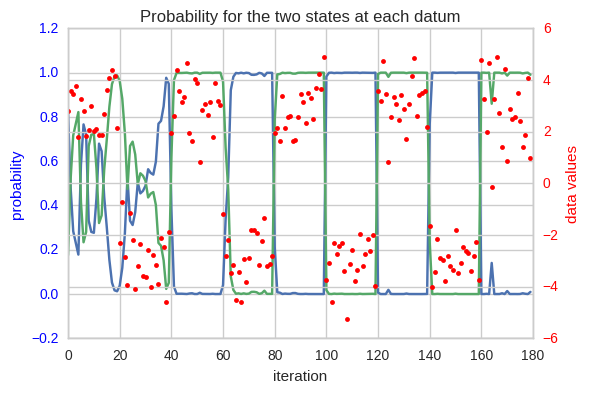

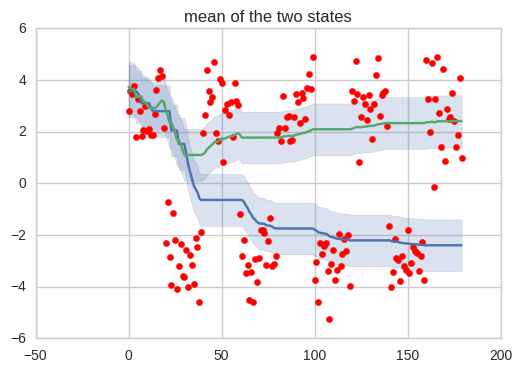

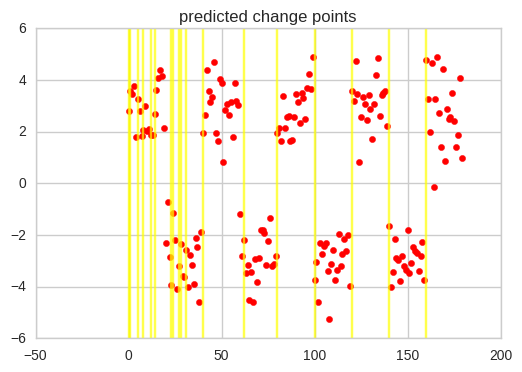

NameError: name 'evaluate' is not defined

In [13]:
trueMean = [-3,3]
trueVar = [1.,1.]
d, trueCP = TestData(mean=trueMean, var=trueVar, n=20, skips=8)
M = np.matrix([[0.9, 0.1],[0.1, 0.9]])
cpd = OpperMAP(2, M)
z,m,v, cp = cpd.run(d)
#print z
plotMultiStateParticleAna(d, z, m, v, cp)
evaluate(trueCP, cp, trueMean, m)

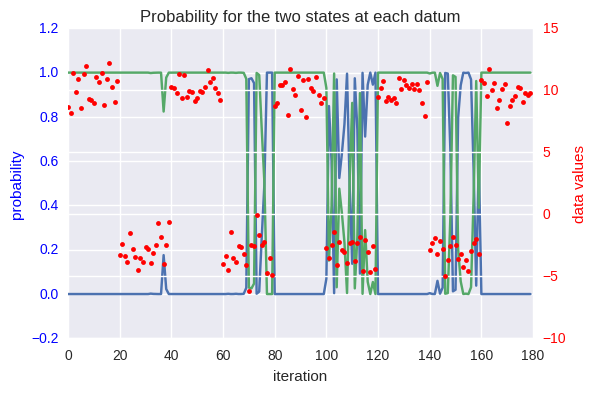

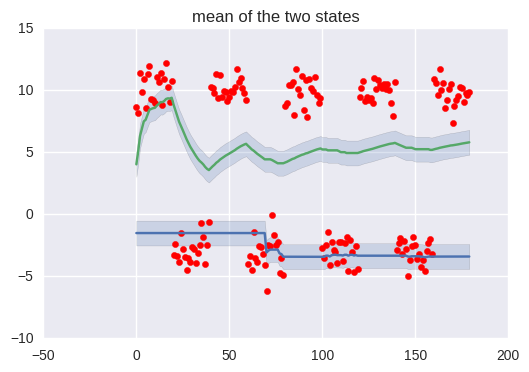

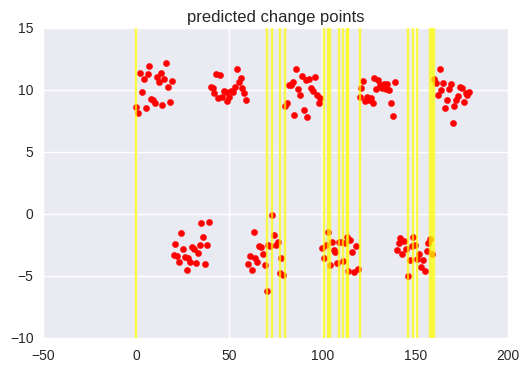

F1: 0.285714285714


In [32]:
trueMean = [-3,10]
trueVar = [1.,1.]
d, trueCP = TestData(mean=trueMean, var=trueVar, n=20, skips=8)
M = np.matrix([[0.9, 0.1],[0.1, 0.9]])
cpd = OpperMAP(2, M)
z,m,v, cp = cpd.run(d)
#print z
plotMultiStateParticleAna(d, z, m, v, cp)
evaluate(trueCP, cp, trueMean, m)

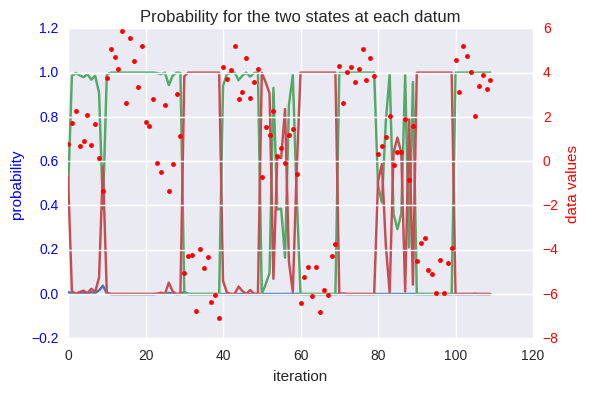

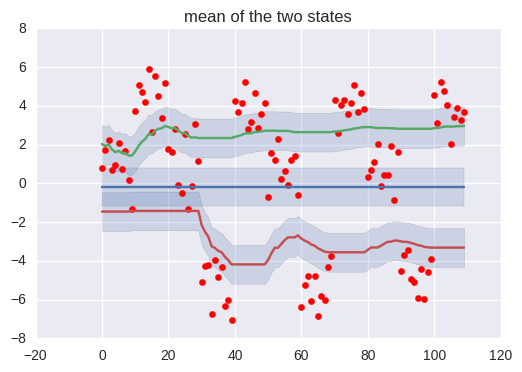

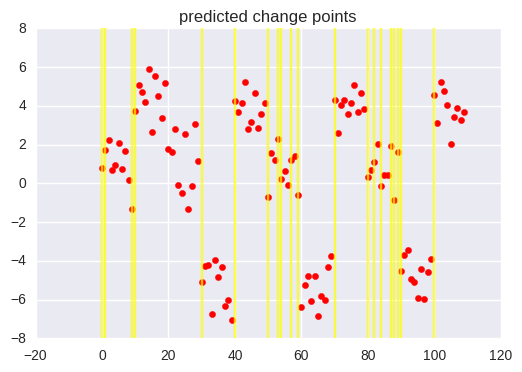

NameError: name 'evaluate' is not defined

In [13]:
trueMean = [4,1,-5]
trueVar = [1,1,1]
d, trueCP = TestData(mean=trueMean, var=trueVar, n=10, skips=10)
M = np.matrix([[0.8, 0.1, 0.1],[0.1, 0.8, 0.1], [0.1, 0.1, 0.8]])
cpd = OpperMAP(3, M)
z,m,v, cp = cpd.run(d)
#print z
plotMultiStateParticleAna(d, z, m, v, cp)
evaluate(trueCP, cp, trueMean, m)

In [11]:
class OpperSOFT(object):
    def __init__(self, n, M):       
        self.M = M
        self.stateList = []
        self.prevZMax = -2
        for i in range(n):
            theta = [np.random.uniform(-5, 5),1]#TODO
            self.stateList.append(self.initState(1.0/n, theta))
        
    def initState(self, z, theta):
        return {'z':z, 'theta':theta, 'likelihood': [theta[0],1]}
        
    def computeTheta(self, _x, _theta):
        theta = _theta
        #compute updated var
        theta[1] = 1.0/(1.0/theta[1] + 1)
        #compute updated mean
        theta[0] = 1.0/(1.0/theta[1] + 1) * (_x + theta[0]/theta[1])
        return theta
    
    def computeIntegral(self, _x, _theta): 
        exp = np.exp( (_x + _theta[0])**2/4 - (_x**2-_theta[0]**2)/2 )
        return np.sqrt(np.pi)/(2*np.pi) * exp
    
    def update(self, _x): 
        zSum = 0
        zMax = 0
        zMaxIndex = -1
        for i,s in enumerate(self.stateList):
            transitionProb = 0
            for k,j in enumerate(self.M[:,i]):
                sTemp = self.stateList[k]
                transitionProb +=  sTemp['z'] * j.item(0)
            unnormZ = self.computeIntegral(_x, s['theta']) * transitionProb
            s['unnormZ'] = unnormZ
            zSum += unnormZ
            #finding maximum z
            if unnormZ > zMax:
                zMax = unnormZ
                zMaxIndex = i        
        #normalising z
        for s in self.stateList:
            s['z'] = s['unnormZ']/zSum
            
        #update state of zMax
        if(zMaxIndex > -1):
            self.stateList[zMaxIndex]['theta'] = self.computeTheta(_x, self.stateList[zMaxIndex]['theta'])
            self.stateList[zMaxIndex]['likelihood'][0] = self.stateList[zMaxIndex]['theta'][0]        
        z = [x['z'] for x in self.stateList]
        mean = [x['likelihood'][0] for x in self.stateList]
        var = [x['likelihood'][1] for x in self.stateList]
        cpbool = zMaxIndex != self.prevZMax
        self.prevZMax = zMaxIndex        
        return z, mean, var, cpbool
    
    def run(self,data):
        z = []
        mean = []
        var = []
        cp = []
        for t,d in enumerate(data):
            zi, mi, vari, cpbool = self.update(d)
            z.append(list(zi))
            mean.append(list(mi))
            var.append(list(vari))
            if cpbool:
                cp.append(t+1)
        return z, mean, var, cp

## Andreas

In [109]:
class AndreasBayesFilterMAP(object):   
    def __init__(self, n, M):       
        self.M = M
        self.stateList = []
        self.prevZMax = -2
        for i in range(n):
            theta = [np.random.uniform(-3, 3),1]#TODO
            self.stateList.append(self.initState(1.0/n, theta))
        
    def initState(self, z, theta):
        return {'z':z, 'theta':theta, 'likelihood': [theta[0],1]}
        
    def computeTheta(self, _x, _theta):
        theta = _theta
        #compute updated var
        theta[1] = 1.0/(1.0/theta[1] + 1)
        #compute updated mean
        theta[0] = 1.0/(1.0/theta[1] + 1) * (_x + theta[0]/theta[1])
        return theta
    
    def update(self, _x): 
        zSum = 0
        zMax = 0
        zMaxIndex = -1
        for i,s in enumerate(self.stateList):
            likelihood = scipy.stats.norm(s['likelihood'][0], s['likelihood'][1]).pdf(_x)
            transitionProb = 0
            for k,j in enumerate(self.M[:,i]):
                sTemp = self.stateList[k]
                transitionProb +=  sTemp['z'] * j.item(0) * scipy.stats.norm(sTemp['theta'][0], sTemp['theta'][1]).pdf(sTemp['likelihood'][0])
            unnormZ = likelihood * transitionProb
            s['unnormZ'] = unnormZ
            zSum += unnormZ
            #finding maximum z
            if unnormZ > zMax:
                zMax = unnormZ
                zMaxIndex = i        
        #normalising z
        for s in self.stateList:
            s['z'] = s['unnormZ']/zSum
        #update state of zMax
        if(zMaxIndex > -1):
            self.stateList[zMaxIndex]['theta'] = self.computeTheta(_x, self.stateList[zMaxIndex]['theta'])
            self.stateList[zMaxIndex]['likelihood'][0] = self.stateList[zMaxIndex]['theta'][0]        
        z = [x['z'] for x in self.stateList]
        mean = [x['likelihood'][0] for x in self.stateList]
        var = [x['likelihood'][1] for x in self.stateList]
        cpbool = zMaxIndex != self.prevZMax
        self.prevZMax = zMaxIndex        
        return z, mean, var, cpbool
    
    def run(self,data):
        z = []
        mean = []
        var = []
        cp = []
        for t,d in enumerate(data):
            zi, mi, vari, cpbool = self.update(d)
            z.append(list(zi))
            mean.append(list(mi))
            var.append(list(vari))
            if cpbool:
                cp.append(t+1)
        return z, mean, var, cp

In [3]:
class AndreasBayesFilterSOFT(object):   
    def __init__(self, n, M):       
        self.M = M
        self.stateList = []
        self.prevZMax = -2
        for i in [-1,1]:
            theta = [i,1]#TODO
            self.stateList.append(self.initState(1.0/n, theta))
        
    def initState(self, z, theta):
        return {'z':z, 'theta':theta, 'likelihood': [theta[0],1]}
        
    def computeTheta(self, _x, _theta, _z):
        theta = _theta
        #compute updated var
        theta[1] = 1.0/(1.0/theta[1] + 1)
        #compute updated mean
        theta[0] = 1.0/(1.0/theta[1] + _z) * (_z*_x + theta[0]/theta[1])
        return theta
    
    def update(self, _x): 
        zSum = 0
        zMax = 0
        zMaxIndex = -1
        for i,s in enumerate(self.stateList):
            likelihood = scipy.stats.norm(s['likelihood'][0], s['likelihood'][1]).pdf(_x)
            transitionProb = 0
            for k,j in enumerate(self.M[:,i]):
                sTemp = self.stateList[k]
                transitionProb +=  sTemp['z'] * j.item(0) * scipy.stats.norm(sTemp['theta'][0], sTemp['theta'][1]).pdf(sTemp['likelihood'][0])
            unnormZ = likelihood * transitionProb
            s['unnormZ'] = unnormZ
            zSum += unnormZ 
            if unnormZ > zMax:
                zMax = unnormZ
                zMaxIndex = i 
        #normalising z
        for s in self.stateList:
            s['z'] = s['unnormZ']/zSum
            #update state of zMax
            s['theta'] = self.computeTheta(_x, s['theta'], s['z'])
            s['likelihood'][0] = s['theta'][0]   
            
        z = [x['z'] for x in self.stateList]
        mean = [x['likelihood'][0] for x in self.stateList]
        var = [x['likelihood'][1] for x in self.stateList]
        cpbool = zMaxIndex != self.prevZMax
        self.prevZMax = zMaxIndex        
        return z, mean, var, cpbool
    
    def run(self,data):
        z = []
        mean = []
        var = []
        cp = []
        for t,d in enumerate(data):
            zi, mi, vari, cpbool = self.update(d)
            z.append(list(zi))
            mean.append(list(mi))
            var.append(list(vari))
            if cpbool:
                cp.append(t+1)
        return z, mean, var, cp

In [6]:
trueMean = [20,0,-5]
trueVar = [4,0.3,1]
d, trueCP = TestData(mean=trueMean, var=trueVar, n=5, skips=10)
M = np.matrix([[0.8, 0.1, 0.1],[0.1, 0.8, 0.1], [0.1, 0.1, 0.8]])
cpd = AndreasBayesFilterSOFT(3, M)
z,m,v, cp = cpd.run(d)
#print z
plotMultiStateParticleAna(d, z, m, v, cp)
evaluate(trueCP, cp, trueMean, m)

IndexError: list index out of range